In [111]:
from numpy import mean
# import numpy as np
# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import MinAbsScaler
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import nltk
import string
import contractions
from statistics import mean
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
# import sklearn
# import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score ,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as imbpipeline
# from sklearn.pipeline import Pipeline

In [112]:
import warnings
warnings.filterwarnings("ignore")

# DATA CLEANING

In [113]:
df = pd.read_csv('labeled_data.csv')

In [114]:
df.info

<bound method DataFrame.info of        Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                           

In [115]:
df['tweet'][1]

'!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'

In [116]:
#Rename column names which are displaced by row
df = df.rename(columns={"Unnamed: 0": "Tweet ID"})

In [117]:
#Get the Columns with NAN values
print(df.isnull().sum().sort_values())

Tweet ID              0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [118]:
df.nunique()

Tweet ID              24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [119]:
df.isna().sum()

Tweet ID              0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [120]:
df.memory_usage()

Index                    128
Tweet ID              198264
count                 198264
hate_speech           198264
offensive_language    198264
neither               198264
class                 198264
tweet                 198264
dtype: int64

# DATA PREPROCESSING

In [121]:
#Expansion of Clitics:
#For example, Shouldn't -> Should not, I'll -> I will
def cliticexp(sent:str):
    # creating an empty list
    expanded_words = []   
    for word in sent.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  

    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [122]:
#Tokenizes sentences
def sent_tokenizer(sent:str):
    tokens = re.split(r"[^A-Za-z0-9-']",sent)
    tokens = list(filter(len,tokens))
    return tokens

In [123]:
#Removes punctuations
def listtostring(L:list):
    string = ""
    for l in L:
        string = string+l.lower()+' '
    return string.strip()

In [124]:
def preprocessPipeline(content):
#     tokenized = []
    content = cliticexp(content)
    tok = sent_tokenizer(content)
#     tokenized.append(listtostring(tok))
    return listtostring(tok)

In [125]:
preprocessPipeline("I'll shouldn't have done that, however I had to!")

'i will should not have done that however i had to'

In [126]:
#Converting list of tokens to lowercase string
tokenized = []
for i in range(len(df)):
#     tok = sent_tokenizer(df.iloc[i,6])
#     tokenized.append(listtostring(tok))
    tokenized.append(preprocessPipeline(df.iloc[i,6]))

In [127]:
tokenized

['rt mayasolovely as a woman you should not complain about cleaning up your house amp as a man you should always take the trash out',
 'rt mleew17 boy dats cold tyga dwn bad for cuffin dat hoe in the 1st place',
 'rt urkindofbrand dawg rt 80sbaby4life you ever fuck a bitch and she start to cry you be confused as shit',
 'rt c g anderson viva based she look like a tranny',
 'rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361',
 't madison x the shit just blows me claim you so faithful and down for somebody but still fucking with hoes 128514 128514 128514',
 'brighterdays i can not just sit up and hate on another bitch i got too much shit going on',
 '8220 selfiequeenbri because i am tired of you big bitches coming for us skinny girls 8221',
 'amp you might not get ya bitch back amp that is that',
 'rhythmixx hobbies include fighting mariam bitch',
 'keeks is a bitch she curves everyone lol i walked into a conversation l

In [128]:
df['Processed_Tweets'] = tokenized

In [129]:
df.head(5)

,Tweet ID,count,hate_speech,offensive_language,neither,class,tweet,Processed_Tweets
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you should not comp...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dats cold tyga dwn bad for cuff...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4life you ever...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me m...


# EXPLORATORY DATA ANALYSIS

In [87]:
df.describe()

,Tweet ID,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [88]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Tweet ID            24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   Processed_Tweets    24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


<AxesSubplot: xlabel='class', ylabel='count'>

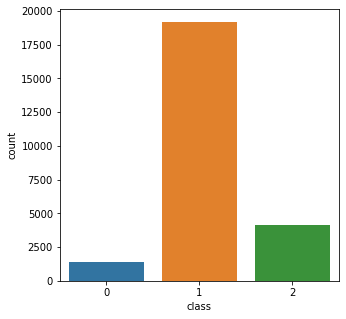

In [90]:
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class',data = df)

# BUILDING A  BASELINE MODEL

In [92]:
# Initialize the TfidfVectorizer model and document-term matrix
# Pre-process the documents
def vectorize_train(training_docs):
    tfidf_train = None
# Initialize the TfidfVectorizer model and document-term matrix
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
#     print(type(training_docs))
    tfidf_train = vectorizer.fit_transform(training_docs)
    return vectorizer, tfidf_train

In [93]:
#Initializing the vectorizer
vectorizer, tfidf_train = vectorize_train(df['Processed_Tweets'])

In [ ]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_train,df['class'],test_size=0.20,random_state=0, stratify = df['class'])

In [ ]:
#Building a logistic regression model
LR = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial')

In [ ]:
#Fitting the model
LR.fit(X_train,Y_train)

In [ ]:
#Making the prediction
pred = LR.predict(X_test)

In [ ]:
#RESULTS
import sklearn
confusion = sklearn.metrics.confusion_matrix(Y_test,pred)
accuracy = sklearn.metrics.accuracy_score(Y_test,pred)
#precision = sklearn.metrics.precision_score(Y_test,pred)
#recall = sklearn.metrics.recall_score(Y_test,pred)
#F1 = (2 * precision * recall)/(precsion + recall)

In [ ]:
print("CONFUSION MATRIX")
print(confusion)

In [ ]:
#Class-wise Precision score
ph = confusion[0,0]/ np.sum(confusion[:,0])
poff = confusion[1,1]/ np.sum(confusion[:,1])
pn = confusion[2,2]/ np.sum(confusion[:,2])
print("Precision for Hate Tweets:",ph)
print("Precision for Offensive Tweets:",poff)
print("Precision for Neutral Tweets:",pn)

In [ ]:
#Class-wise Recall/Sensitivity score
rh = confusion[0,0]/ np.sum(confusion[0,:])
roff = confusion[1,1]/ np.sum(confusion[1,:])
rn = confusion[2,2]/ np.sum(confusion[2,:])
print("Recall for Hate Tweets:",rh)
print("Recall for Offensive Tweets:",roff)
print("Recall for Neutral Tweets:",rn)

In [ ]:
#Class-wise F1 Score
f1h = (2*ph*rh)/(ph+rh)
f1off = (2*poff*roff)/(poff+roff)
f1n = (2*pn*rn)/(pn+rn)
print("F1 Score for Hate Tweets:",f1h)
print("F1 Score for Offensive Tweets:",f1off)
print("F1 Score for Neutral Tweets:",f1n)

In [ ]:
#Class-wise Accuracy Score
rh = confusion[0,0]/ np.sum(confusion[0,:])
roff = confusion[1,1]/ np.sum(confusion[1,:])
rn = confusion[2,2]/ np.sum(confusion[2,:])
print("Recall for Hate Tweets:",rh)
print("Recall for Offensive Tweets:",roff)
print("Recall for Neutral Tweets:",rn)

In [ ]:
#Classification Report
print(sklearn.metrics.classification_report(Y_test,pred))
print("Overall Accuracy =","{0:.4f}".format(accuracy*100),"%")

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test,Y_pred)
accuracy = sklearn.metrics.accuracy_score(Y_test,Y_pred)

ph = confusion[0,0]/ np.sum(confusion[:,0])
poff = confusion[1,1]/ np.sum(confusion[:,1])
pn = confusion[2,2]/ np.sum(confusion[:,2])

rh = confusion[0,0]/ np.sum(confusion[0,:])
roff = confusion[1,1]/ np.sum(confusion[1,:])
rn = confusion[2,2]/ np.sum(confusion[2,:])

f1h = (2*ph*rh)/(ph+rh)
f1off = (2*poff*roff)/(poff+roff)
f1n = (2*pn*rn)/(pn+rn)
print("Recall for Hate Tweets:",f1h)
print("Recall for Offensive Tweets:",f1off)
print("Recall for Neutral Tweets:",f1n)

In [ ]:
# MLP Classifier
clf = MLPClassifier(max_iter=10, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(Y_test, y_pred))
print("Accuracy",accuracy_score(Y_test, y_pred))

In [ ]:
#Class-wise Accuracy Score
confusion = sklearn.metrics.confusion_matrix(Y_test,y_pred)
accuracy = sklearn.metrics.accuracy_score(Y_test,y_pred)

rh = confusion[0,0]/ np.sum(confusion[0,:])
roff = confusion[1,1]/ np.sum(confusion[1,:])
rn = confusion[2,2]/ np.sum(confusion[2,:])
print("Recall for Hate Tweets:",rh)
print("Recall for Offensive Tweets:",roff)
print("Recall for Neither Tweets:",rn)

In [ ]:
#AdaBoost Classifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
confusion = sklearn.metrics.confusion_matrix(Y_test,y_pred)
accuracy = sklearn.metrics.accuracy_score(Y_test,y_pred)

print(confusion)
print(accuracy)

rh = confusion[0,0]/ np.sum(confusion[0,:])
roff = confusion[1,1]/ np.sum(confusion[1,:])
rn = confusion[2,2]/ np.sum(confusion[2,:])
print("Accuracy for Hate Tweets:",rh)
print("Accuracy for Offensive Tweets:",roff)
print("Accuracy for Neither Tweets:",rn)

### To experiment on more models, we build a function i.e. model pipeline

In [154]:
tfidf_train_temp = tfidf_train
y_ = df['class']

In [155]:
def modelPipeline(classifier,k=3):
    accHate= []
    accOff = []
    accN = []
    Oacc = []
    metricsDict = {}
#     k = 5
#     kf = KFold(n_splits=k, random_state=None)
    skf = StratifiedKFold(n_splits=k)
    vectorizer, tfidf_train = vectorize_train(df['Processed_Tweets'])
    Xkf = tfidf_train_temp
    ykf = y_
    for train_index , test_index in skf.split(Xkf, ykf):
#         X_train , X_test = Xkf.iloc[train_index,:],Xkf.iloc[test_index,:]
#         y_train , y_test = ykf[train_index] , ykf[test_index]
        X_train, X_test = Xkf[train_index], Xkf[test_index]
        y_train, y_test = ykf[train_index], ykf[test_index]

        classifier.fit(X_train,y_train)
        pred_values = classifier.predict(X_test)
        cm = confusion_matrix(y_test,pred_values)
        accuracy = accuracy_score(y_test,pred_values)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        accList = cm.diagonal()
        accHate.append(accList[0])
        accOff.append(accList[1])
        accN.append(accList[2])
        Oacc.append(accuracy)
    
    metricsDict['Hate'] = mean(accHate)
    metricsDict['Offensive'] = mean(accOff)
    metricsDict['Neither'] = mean(accN)
    overallAcc = mean(Oacc)
    return metricsDict, overallAcc

In [98]:
# Logistic Regression
LR = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial')
classWiseAcc, overallAcc = modelPipeline(LR,5)
print('\033[1;3m' + str(LR) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

LogisticRegression(C=50.0, multi_class='multinomial')
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.13216783216783218, 'Offensive': 0.9734757686294945, 'Neither': 0.7857440091421184}
Average overall Accuracy
0.8933951026446487


In [56]:
# Random Forest Classifier
rf=RandomForestClassifier(n_estimators=10)
classWiseAcc, overallAcc = modelPipeline(rf,2)
print('\033[1;3m' + str(rf) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

RandomForestClassifier(n_estimators=10)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.06783216783216783, 'Offensive': 0.9865033871808233, 'Neither': 0.39659427204001624}
Average overall Accuracy
0.834402686064184


In [57]:
# Random Forest classifier with balanced class weights
rfb = RandomForestClassifier(n_estimators=10, class_weight='balanced')
classWiseAcc, overallAcc = modelPipeline(rfb,2)
print('\033[1;3m' + str(rfb) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

RandomForestClassifier(class_weight='balanced', n_estimators=10)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.05594405594405595, 'Offensive': 0.9816050026055236, 'Neither': 0.5385667682674913}
Average overall Accuracy
0.8537710976578254


In [58]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
classWiseAcc, overallAcc = modelPipeline(knn,2)
print('\033[1;3m' + str(knn) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

KNeighborsClassifier(n_neighbors=3)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.26573426573426573, 'Offensive': 0.9451797811360083, 'Neither': 0.4600060425024731}
Average overall Accuracy
0.8244766800327129


In [59]:
# Decision Tree classifier
decT = DecisionTreeClassifier(ra ndom_state=0)
classWiseAcc, overallAcc = modelPipeline(decT,2)
print('\033[1;3m' + str(knn) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

KNeighborsClassifier(n_neighbors=3)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.24265734265734265, 'Offensive': 0.9466388744137572, 'Neither': 0.8731710351328358}
Average overall Accuracy
0.8936774346934058


In [60]:
# XGBoost classifier
xgb = XGBClassifier()
classWiseAcc, overallAcc = modelPipeline(xgb,2)
print('\033[1;3m' + str(xgb) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.24615384615384617, 'Offensive': 0.9476289734236581, 'Neither': 0.9325021545745067}
Average overall Accuracy
0.9046122374321645


In [61]:
# Support Vector Machines
svmClf = svm.SVC(kernel = 'linear')
classWiseAcc, overallAcc = modelPipeline(svmClf,2)
print('\033[1;3m' + str(svmClf) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

SVC(kernel='linear')
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.06293706293706294, 'Offensive': 0.978999478895258, 'Neither': 0.7290441952046811}
Average overall Accuracy
0.8841545598470828


In [62]:
# SGD Classifier
sgd = SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3,   n_iter_no_change=10, early_stopping=True, n_jobs=-1 )
classWiseAcc, overallAcc = modelPipeline(sgd,2)
print('\033[1;3m' + str(sgd) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)


SGDClassifier(early_stopping=True, loss='modified_huber', n_iter_no_change=10,
              n_jobs=-1)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.09440559440559441, 'Offensive': 0.9795726941115164, 'Neither': 0.6500156255698024}
Average overall Accuracy
0.873138949170661


In [130]:
X = tfidf_train
y = df['class']

In [142]:
#########SMOTE DECISION TREE##########
# values to evaluate. k represents the k value for SMOTE
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
for k in k_values:
    # define pipeline
    sampling_strategy = "not minority"
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = imbpipeline(steps=steps)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    pipeline.fit(X_train,y_train)
    pred_values = pipeline.predict(X_test)
    cm = confusion_matrix(y_test,pred_values)
    accuracy = accuracy_score(y_test,pred_values)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accList = cm.diagonal()
    accHate.append(accList[0])
    accOff.append(accList[1])
    accN.append(accList[2])
    Oacc.append(accuracy)

In [143]:
accHate

[0.6713286713286714,
 0.6713286713286714,
 0.6993006993006993,
 0.6643356643356644,
 0.6293706293706294,
 0.6713286713286714,
 0.6783216783216783]

In [144]:
Oacc

[0.7526230831315577,
 0.7719935431799838,
 0.7667473769168685,
 0.7841000807102502,
 0.7796610169491526,
 0.7687651331719129,
 0.7824858757062146]

In [145]:
accN

[0.84375,
 0.8725961538461539,
 0.8894230769230769,
 0.9182692307692307,
 0.8918269230769231,
 0.8894230769230769,
 0.8894230769230769]

In [146]:
accOff

[0.7389265242313705,
 0.7576862949452841,
 0.7451797811360084,
 0.7639395518499218,
 0.7665450755601876,
 0.7498697238144867,
 0.7670661803022407]

In [170]:
X = tfidf_train
y = df['class']
#########SMOTE XGB############
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
for k in k_values:
    # define pipeline
    sampling_strategy = "not minority"
    model = XGBClassifier()
    over = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = imbpipeline(steps=steps)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    pipeline.fit(X_train,y_train)
    pred_values = pipeline.predict(X_test)
    cm = confusion_matrix(y_test,pred_values)
    accuracy = accuracy_score(y_test,pred_values)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accList = cm.diagonal()
    accHate.append(accList[0])
    accOff.append(accList[1])
    accN.append(accList[2])
    Oacc.append(accuracy)

In [64]:
accHate

[0.6853146853146853,
 0.7272727272727273,
 0.6293706293706294,
 0.6783216783216783,
 0.6853146853146853,
 0.6293706293706294,
 0.6643356643356644]

In [65]:
accOff

[0.8118811881188119,
 0.7816571130797291,
 0.8092756644085461,
 0.7931214174048984,
 0.7826993225638353,
 0.801980198019802,
 0.8030224075039083]

In [66]:
accN

[0.9110576923076923,
 0.9110576923076923,
 0.9014423076923077,
 0.8966346153846154,
 0.9110576923076923,
 0.8966346153846154,
 0.9230769230769231]

In [67]:
Oacc

[0.821226795803067,
 0.8002421307506054,
 0.814366424535916,
 0.8038740920096852,
 0.7986279257465698,
 0.807909604519774,
 0.8151735270379338]

In [147]:
####Borderline SMOTE#####
from imblearn.over_sampling import BorderlineSMOTE 
X = tfidf_train
y = df['class']
#########BorderlineSMOTE XGB
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
for k in k_values:
    # define pipeline
    sampling_strategy = "not minority"
    model = XGBClassifier()
    over = BorderlineSMOTE(sampling_strategy=sampling_strategy, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = imbpipeline(steps=steps)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    pipeline.fit(X_train,y_train)
    pred_values = pipeline.predict(X_test)
    cm = confusion_matrix(y_test,pred_values)
    accuracy = accuracy_score(y_test,pred_values)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accList = cm.diagonal()
    accHate.append(accList[0])
    accOff.append(accList[1])
    accN.append(accList[2])
    Oacc.append(accuracy)

In [148]:
print(accHate)
print(accOff)
print(accN)
print(Oacc)

[0.6503496503496503, 0.7062937062937062, 0.6433566433566433, 0.6573426573426573, 0.6713286713286714, 0.7062937062937062, 0.7132867132867133]
[0.7832204273058885, 0.7967691505992704, 0.795205836373111, 0.7905158936946326, 0.7910369984366857, 0.7931214174048984, 0.7920792079207921]
[0.9206730769230769, 0.8990384615384616, 0.9182692307692307, 0.9110576923076923, 0.8870192307692307, 0.8966346153846154, 0.9375]
[0.7986279257465698, 0.8087167070217918, 0.8071025020177562, 0.8030669895076675, 0.8002421307506054, 0.8054882970137207, 0.8119451170298628]


In [149]:
#### SVM SMOTE #####
from imblearn.over_sampling import SVMSMOTE 
X = tfidf_train
y = df['class']
#########SVMSMOTE XGB
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
for k in k_values:
    # define pipeline
    sampling_strategy = "not minority"
    model = XGBClassifier()
    over = SVMSMOTE(sampling_strategy=sampling_strategy, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = imbpipeline(steps=steps)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    pipeline.fit(X_train,y_train)
    pred_values = pipeline.predict(X_test)
    cm = confusion_matrix(y_test,pred_values)
    accuracy = accuracy_score(y_test,pred_values)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accList = cm.diagonal()
    accHate.append(accList[0])
    accOff.append(accList[1])
    accN.append(accList[2])
    Oacc.append(accuracy)

In [150]:
print(accHate)
print(accOff)
print(accN)
print(Oacc)

[0.6713286713286714, 0.6503496503496503, 0.6923076923076923, 0.6643356643356644, 0.6433566433566433, 0.6503496503496503, 0.6783216783216783]
[0.8004168837936425, 0.7957269411151642, 0.7868681605002605, 0.7899947889525795, 0.7894736842105263, 0.7926003126628453, 0.7800937988535696]
[0.9254807692307693, 0.9230769230769231, 0.9158653846153846, 0.9375, 0.90625, 0.9278846153846154, 0.9230769230769231]
[0.8139628732849071, 0.8087167070217918, 0.8030669895076675, 0.8075060532687651, 0.8006456820016142, 0.8071025020177562, 0.7982243744955609]


In [ ]:
#### KMeans SMOTE #####
from imblearn.over_sampling import KMeansSMOTE
X = tfidf_train
y = df['class']
#########KMeansSMOTE XGB
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
for k in k_values:
    # define pipeline
    sampling_strategy = "not minority"
    model = XGBClassifier()
    over = KMeansSMOTE(sampling_strategy=sampling_strategy, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=sampling_strategy)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = imbpipeline(steps=steps)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in rskf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    pipeline.fit(X_train,y_train)
    pred_values = pipeline.predict(X_test)
    cm = confusion_matrix(y_test,pred_values)
    accuracy = accuracy_score(y_test,pred_values)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accList = cm.diagonal()
    accHate.append(accList[0])
    accOff.append(accList[1])
    accN.append(accList[2])
    Oacc.append(accuracy)

In [ ]:
print(accHate)
print(accOff)
print(accN)
print(Oacc)

In [165]:
### SMOTE with Tomek Links ###
from imblearn.combine import SMOTETomek
X = tfidf_train
y = df['class']
#########SMOTEtOMEK XGB
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}
# for k in k_values:
#     # define pipeline
#     sampling_strategy = "not minority"
#     model = XGBClassifier()
#     over = SMOTETomek(sampling_strategy=sampling_strategy, k_neighbors=k)
#     under = RandomUnderSampler(sampling_strategy=sampling_strategy)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = imbpipeline(steps=steps)
#     rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     for train_index, test_index in rskf.split(X, y):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#     pipeline.fit(X_train,y_train)
#     pred_values = pipeline.predict(X_test)
#     cm = confusion_matrix(y_test,pred_values)
#     accuracy = accuracy_score(y_test,pred_values)
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     accList = cm.diagonal()
#     accHate.append(accList[0])
#     accOff.append(accList[1])
#     accN.append(accList[2])
#     Oacc.append(accuracy)
    
smt = SMOTETomek(sampling_strategy='all', random_state=42)
X_res, y_res = smt.fit_resample(X, y)
tfidf_train_temp = X_res
y_ = y_res
y_res_analysis_tomek = y_res
xgb = XGBClassifier()
classWiseAcc, overallAcc = modelPipeline(xgb,2)
print('\033[1;3m' + str(xgb) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.9236060448150079, 'Offensive': 0.7909253905542624, 'Neither': 0.9774358279118126}
Average overall Accuracy
0.8973214285714286


In [166]:
y_res_analysis_tomek.value_counts()

0    19190
1    19189
2    19189
Name: class, dtype: int64

In [167]:
### SMOTE with ENN ###
from imblearn.combine import SMOTEENN
X = tfidf_train
y = df['class']
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
accHate= []
accOff = []
accN = []
Oacc = []
metricsSMOTEDict = {}

smtenn = SMOTEENN(sampling_strategy='all', random_state=42)
X_res, y_res = smtenn.fit_resample(X, y)
tfidf_train_temp = X_res
y_ = y_res
y_res_analysis = y_res
xgb = XGBClassifier()
classWiseAcc, overallAcc = modelPipeline(xgb,2)
print('\033[1;3m' + str(xgb) + '\033[0m')
print('----------------------------------------------------------------------------')
print('Average acuracy for each class')
print(classWiseAcc)
print('Average overall Accuracy')
print(overallAcc)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)
----------------------------------------------------------------------------
Average acuracy for each class
{'Hate': 0.9747047806300917, 'Offensive': 0.6531209112599092, 'Neither': 0.9952234332560204}
Average overall Accuracy
0.9776852260449402


In [168]:
y_res_analysis.value_counts()

0    19173
2    19051
1      853
Name: class, dtype: int64

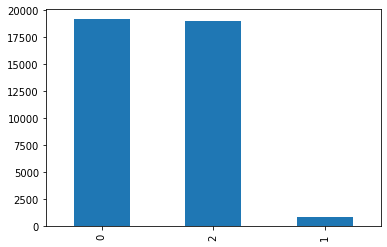

In [169]:
### ENN data resampling ###
y_res_analysis.value_counts().plot(kind='bar');